In [1]:
# Parquet and GeoParquet tutorial 

**Apache Parquet** or justParquet is an open-source, column-oriented file format that makes it faster to retrieve data and uses less memory space for tabular data, than say csv files. 


It is very popular for big data repositories. 

The geospatial version of parquet for storing vector data is the **GeoParquet**. 

This format comes from the necessity to have an fficient and standardized format to store big data efficiently. 

It was first introduced in December 2022. 

This tutorial will be focused on GeoParquet

## First do a catalog search

import all necessary libraries. 

In [13]:
import geopandas as gpd
import matplotlib.pyplot as plt 

import pystac_client 
import planetary_computer

import contextily as ctx # adding basemaps

We use the 2020 US Census collection id `us-census` to look for the data in the MPC catalog. 

This collection has each tabular file as an item: 

In [7]:
# open MPC catalog 
catalog = pystac_client.Client.open("https://planetarycomputer.microsoft.com/api/stac/v1", modifier = planetary_computer.sign_inplace,)

#search for census collection 
search = catalog.search(collections=['us-census'])

#retrieve items 
items = {item.id : item for item in search.items()}

In [8]:
item = items ['2020-cb_2020_us_county_500k']

In [10]:
asset = item.assets['data']

In [20]:
#Opening 

counties = gpd.read_parquet(asset.href, 
                            storage_options = asset.extra_fields['table:storage_options'])

In [21]:
type(counties)

geopandas.geodataframe.GeoDataFrame

### Contextily 

this is a python library to add basemaps. 

Retrieves tile maps from the internet and makes it possible toplot the alongside our vector data. 

** Example** 

We want tto plot the Santa Barbara county polygon together with a basemap. 


In [24]:
sb = counties[counties.NAME == "Santa Barbara"]
sb

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry
1222,06,083,00277306,0500000US06083,06083,Santa Barbara,Santa Barbara County,CA,California,06,7080860393,2729213352,"MULTIPOLYGON (((-119.04704 33.48382, -119.0384..."


<Axes: >

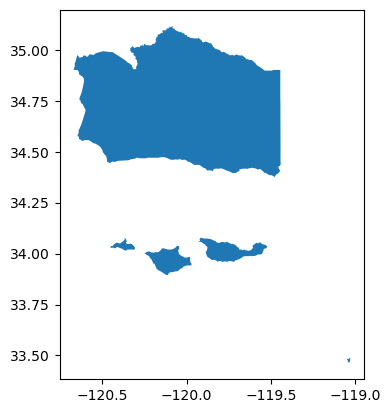

In [25]:
sb.plot() 

Contextily's tiles can be reprojected to match the CRS of our vector data, but...... it can be easier to reproject your vector to EPSG 3857 instead. 

The CRS EPSG 3857 is a projected CRS used for rendering maps online. For example in Google Maps or OpenStreet maps

ValueError: The 'url' dict should at least contain a 'url' key

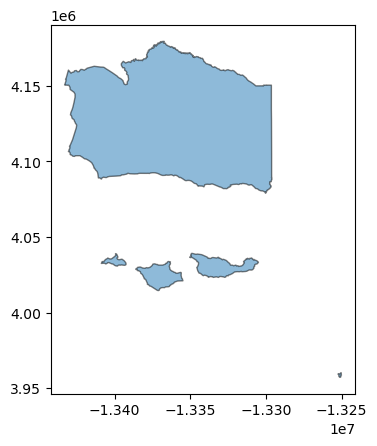

In [31]:
fig, ax = plt.subplots() 

sb.to_crs(epsg=3857).plot(ax=ax, figsize = (7,7), alpha = 0.5, edgecolor = 'k')
 
 #add basemap 
 
ctx.add_basemap(ax, source=ctx.providers.Esri)
 
 #update axes
 
ax.set_title("Santa Barbara County", fontdict={"fontsize": "20"})
                                              #  ax.set_axis_off() 